In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from keras.datasets import mnist
from tensorflow.math import confusion_matrix
from tensorflow import keras


Loading the MNIST data from keras.datasets

In [2]:
(xtrain , ytrain) , (xtest , ytest) = mnist.load_data()

In [3]:
type(xtrain)

numpy.ndarray

In [4]:
print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60,000 Images

Test data = 10,000 Images

Image dimension --> 28 x 28

Grayscale Image --> 1 channe

In [5]:
# printing the 10th image
print(xtrain[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
print(xtrain[10].shape)

(28, 28)


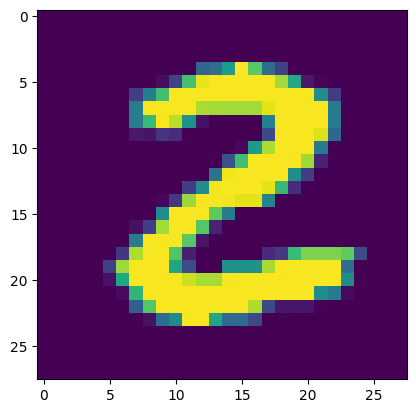

2


In [7]:
# display the image
plt.imshow(xtrain[25])
plt.show()

# print the corresponding label
print(ytrain[25])

Image label

In [8]:
print(ytrain.shape,ytest.shape)

(60000,) (10000,)


In [9]:
#unique values in  ytrain
print(np.unique(ytrain))

# unique values in ytest
print(np.unique(ytest))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding

All the images have the same dimensions in this dataset, If not, we have to resize all the images to a common dimensio

In [10]:
# scaling the values

xtrain = xtrain/255
xtest = xtest / 255


In [11]:
# printing the 10th image
print(xtrain[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [12]:
# setting up the layers of the Neural Network
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:

# compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:

# training the Neural Network
model.fit(xtrain,ytrain,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8504 - loss: 0.5085
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9561 - loss: 0.1462
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9688 - loss: 0.1020
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9753 - loss: 0.0799
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9801 - loss: 0.0643
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9847 - loss: 0.0521
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9870 - loss: 0.0442
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9876 - loss: 0.0398
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9892 - loss: 0.0352
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9909 - loss: 0.0299


Training data accuracy = 99.03%

Accuracy on Test data:

In [15]:
loss,accuracy = model.evaluate(xtest,ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9625 - loss: 0.1389


Test data accuracy = 96.53%

In [16]:
print(xtest.shape)

(10000, 28, 28)


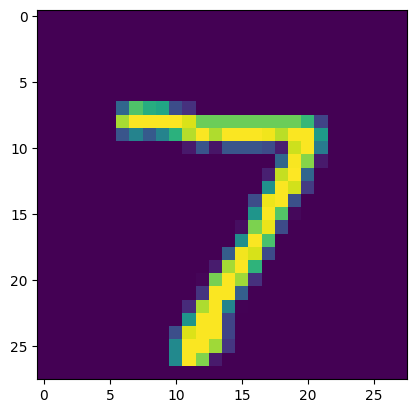

In [17]:
# first data point in xtest
plt.imshow(xtest[0])
plt.show()

In [18]:
print(ytest[0])

7


In [19]:
y_pre = model.predict(xtest)
print(y_pre.shape)
print(y_pre[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step
(10000, 10)
[8.1446941e-04 2.2632268e-03 2.6742700e-03 4.0232885e-01 3.0960393e-06
 1.7222224e-05 2.7721896e-09 9.9999952e-01 3.1488406e-04 9.9431533e-01]


model.predict() gives the prediction probability of each class for that data point

In [20]:
# converting the prediction probailities to class label
label_for_first_test_image = np.argmax(y_pre[0])
print(label_for_first_test_image)

7


In [21]:
# converting the prediction probabilities to class for all test data points 
y_pre_label = [np.argmax(i) for i in y_pre]
print(y_pre_label)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 3, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 5, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 3, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 9, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 5, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 6, 0, 7, 1, 1, 2, 1, 

Y_test --> True labels

Y_pred_labels --> Predicted Labels

Confusin Matrix

In [22]:
conf_mat = confusion_matrix(ytest,y_pre_label)

In [23]:
print(conf_mat)

tf.Tensor(
[[ 959    0    2    1    4    0    6    0    1    7]
 [   0 1122    0    2    2    1    5    1    2    0]
 [   3    1  967   31    6    2    5    8    9    0]
 [   1    0    3  986    1    6    1    3    5    4]
 [   0    1    3    0  959    1    8    1    1    8]
 [   2    0    0   10    1  867    3    1    5    3]
 [   4    2    0    1    4    6  941    0    0    0]
 [   1    2    8    6    5    0    0  993    4    9]
 [   3    0    2   17    5    9    4    3  927    4]
 [   2    2    0   10   14    9    0    4    2  966]], shape=(10, 10), dtype=int32)


Text(0.5, 80.7222222222222, 'Predicted Labels')

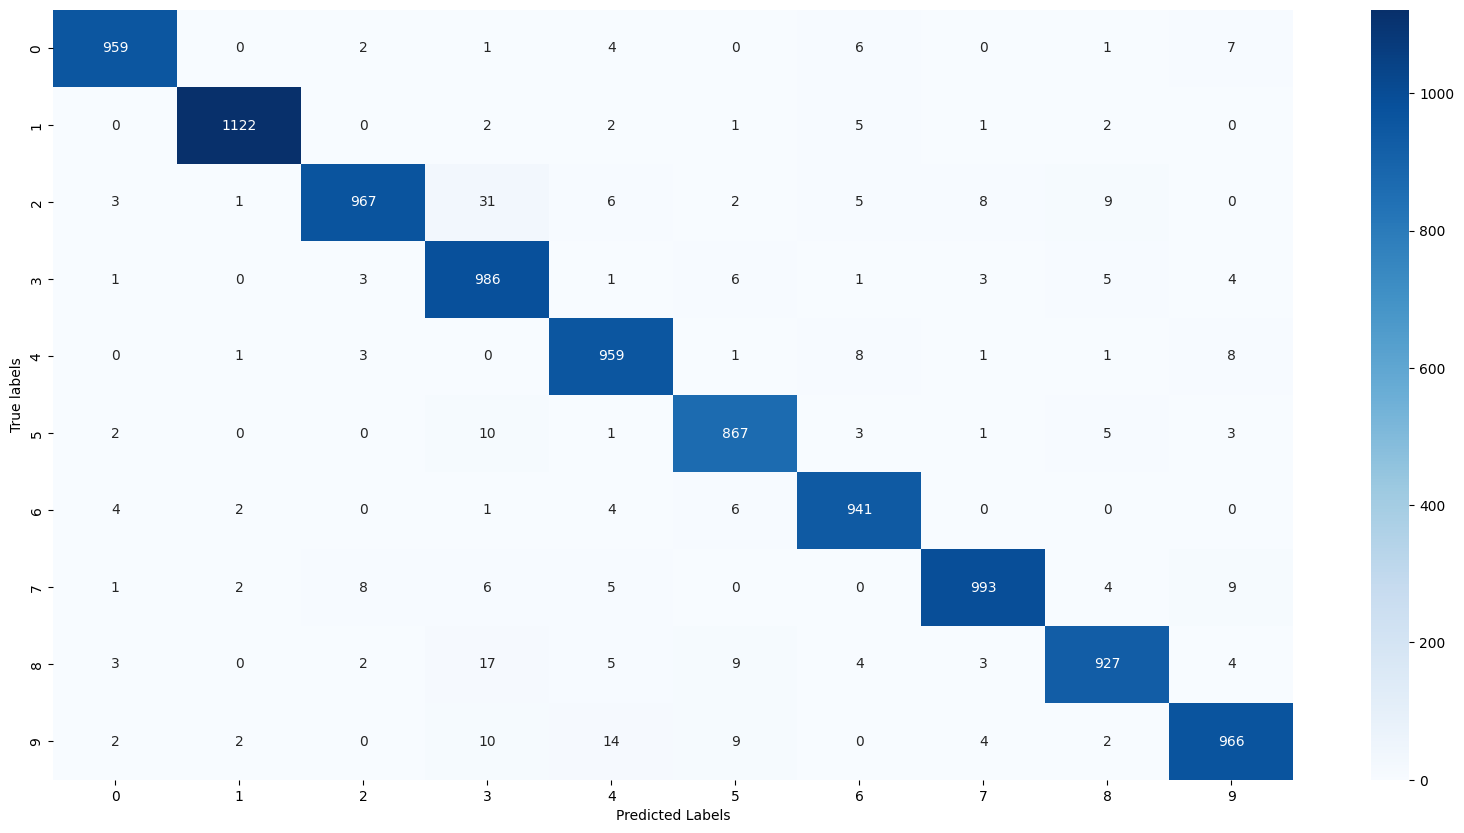

In [24]:
plt.figure(figsize=(20,10))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True labels')
plt.xlabel('Predicted Labels')


In [28]:
input_image_path = 'D:\Reserach\Deep Learning\DL_Project_2_MNIST_Digit_classification_using_NN\MNIST_digit.png'
input_image = cv2.imread(input_image_path)
type(input_image)

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\User\AppData\Local\Temp\ipykernel_15556\3476188318.py:1: SyntaxWarning: invalid escape sequence '\R'
  input_image_path = 'D:\Reserach\Deep Learning\DL_Project_2_MNIST_Digit_classification_using_NN\MNIST_digit.png'


numpy.ndarray

In [30]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


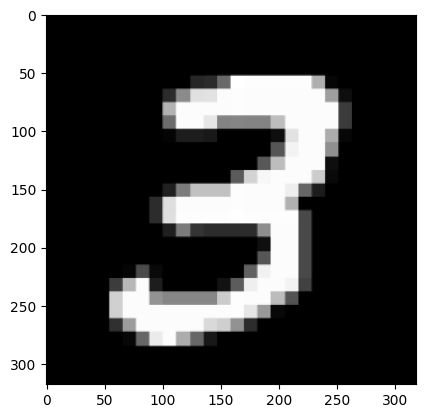

In [31]:
plt.imshow(input_image)

In [32]:
input_image.shape

(318, 318, 3)

In [33]:
grayscale = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
grayscale.shape

(318, 318)

In [34]:
input_image_resize = cv2.resize(grayscale,(28,28))
input_image_resize.shape

(28, 28)

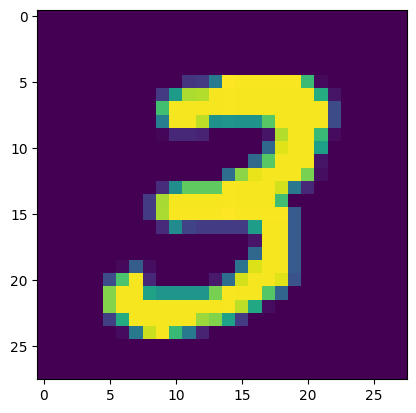

In [35]:
plt.imshow(input_image_resize)

In [36]:
input_image_resize = input_image_resize/255
type(input_image_resize)

numpy.ndarray

In [38]:
image_reshaped = np.reshape(input_image_resize,[1,28,28])


In [39]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[[1.38045695e-11 2.25216430e-03 1.21368617e-01 1.00000000e+00
  1.08198728e-09 9.41881478e-01 3.17681460e-17 3.22624430e-04
  8.81322682e-01 9.66017425e-01]]


In [40]:
input_pre_label = np.argmax(input_prediction)

In [41]:
print(input_pre_label)

3


Predictive System

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
The Handwritten Digit is recognised as  3


<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\User\AppData\Local\Temp\ipykernel_15556\568173338.py:1: SyntaxWarning: invalid escape sequence '\R'
  input_image_pathi = 'D:\Reserach\Deep Learning\DL_Project_2_MNIST_Digit_classification_using_NN\MNIST_digit.png'


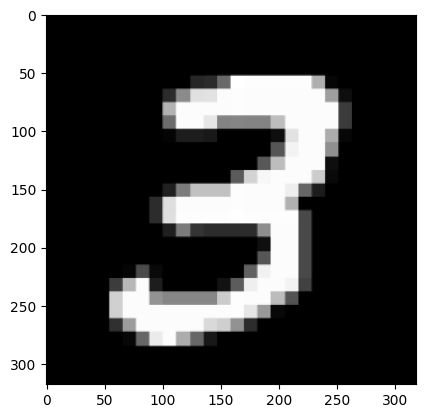

In [42]:
input_image_pathi = 'D:\Reserach\Deep Learning\DL_Project_2_MNIST_Digit_classification_using_NN\MNIST_digit.png'

input_image = cv2.imread(input_image_pathi)

plt.imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)